# Practical example

In [79]:
# importing the relevant libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [80]:
# loading the raw data
raw_data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.04. Real-life example.csv')
raw_data
# information of second hand cars avaiable for sale on a website

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [81]:
# we want to predict the price based on some important features
# of course brand, mileage, engine volume, year of production are key features for our prediction

## Preprocessing
### a. Preprocessing numerical data:
#### 1. numerical data cleaning
#### 2. OLS assumptions
### b. Preprocessing categorical data 

In [82]:
# so far all the data we used was clear and we did not have to clean raw_data into data

#### data cleaning (first part of data preprocessing)

In [83]:
# 1- describe data and determine unimportant features
# raw_data.describe(): this only gives us numerical data description
# use the below to include all numerical and categoriacal data
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [84]:
# first row : count : display the number of observations, and they are not equal to the total number, we have so missing values

# second row: unique: gives the number of uniqe values in each column, in model column we have 312 unique models:
# that is something difficult to implement in our regression, because model is a categorical feature and if we 
# want to use it in our model we need to define 312 dummy variables, as a lot of the other information from 'model'
# could be engineered from 'Brand', 'Year', and 'EngineV' so we won't be loosing too much variability

# third and forth rows are together, because freq gives the frequency of the top feature value. for example 3947 cars
# have been registered which is about 90% of them so this variable won't be very useful.


In [85]:
# 2- drop unimportant variables
# how to get rid of the unrequired variables in our model and keep the variables of interest

data_noUsless_variable = raw_data.drop(['Model'], axis=1) # remember that ==> axis=0 : rows and axis=1 : columns
data_noUsless_variable.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [86]:
# 3- dealing with missing values
# according to our raw_data the total number of observations is 4345, but the count of price is 4173 ans engine volume is
# 4195, meaning that there some missing values for each one. 
# to find the number of missing value there is a method "isnull"  : if missed => True otherwise return false
data_noUsless_variable.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [87]:
# to get the sum of trues (1) we use sum method
data_noUsless_variable.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [88]:
# rule of thumb: if missing values are less than 5% of the total values no probelm with removing them
# we nedd to remove rows including missing values
data_noUsless_variable_no_missing_values = data_noUsless_variable.dropna(axis=0)
data_noUsless_variable_no_missing_values.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


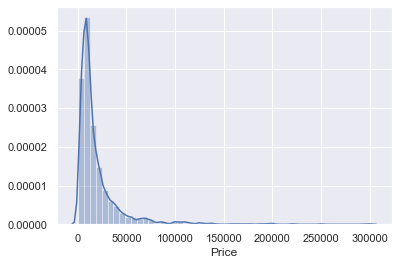

In [89]:
# 4- dealing with distributions (Exploring the PDFs)
# as for optimal results we would be looking for a normal distribution
# using seaborn we can draw the distribution of each feature
sns.distplot(data_noUsless_variable_no_missing_values['Price'])

In [90]:
# As yuo can see price is not following a normal distribution and has a exponential distribution
# it can be problematic in our regression model


In [91]:
# dealing with outliers:
# outliers are observations that lie on abnormal distance from other observations in the data
# looking at descreptive table, regrading the price, we can see while mean is 19552, 25% are belew 6999, 50% are below 11500,
# 75% are below 21900, and maximum is 300000, something strange is hapeening, so we have a few outliers
# outliers effect the regression dramatically and cause the regression to be inflated because the regression tries to place the line closer to those abnormal values
# one way to get rid of outliers seamlessly is to remove top 1% of the observations

# first find the 99% quantile
q99percent = data_noUsless_variable_no_missing_values['Price'].quantile(0.99)
q99percent # the price of 99% of our observations are below 129812

129812.51999999981

In [92]:
# introduce a new data without top 1%
data_noUsless_variable_no_missing_values_noTop1percent = \
data_noUsless_variable_no_missing_values[data_noUsless_variable_no_missing_values['Price']<q99percent]

data_noUsless_variable_no_missing_values_noTop1percent.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


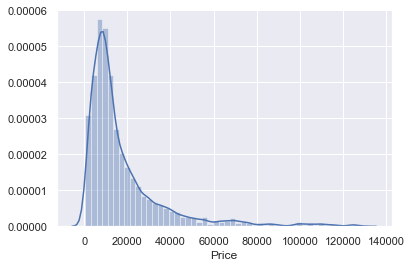

In [93]:
# eliminating outliers let's see its new PDF
sns.distplot(data_noUsless_variable_no_missing_values_noTop1percent['Price'])


In [94]:
# a little bit improvement but still no normal distribution
# let's do the process of mileage, engine volume, and year

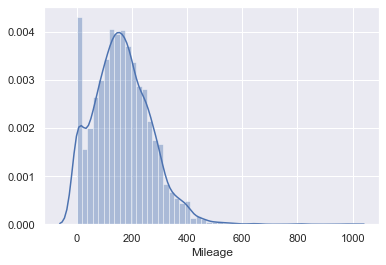

In [95]:
# PDF mileage
sns.distplot(data_noUsless_variable_no_missing_values_noTop1percent['Mileage'])

In [96]:
# keep only 99% and remove top 1% as outliers for mileage
q99percent = data_noUsless_variable_no_missing_values['Mileage'].quantile(0.99)


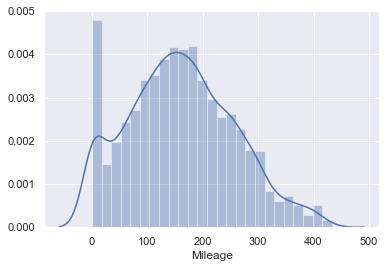

In [97]:
# as the name of our data is getting long we change the name to a shorter one
data_noUV_npMV_noPo = data_noUsless_variable_no_missing_values_noTop1percent # noMV = no missing value, noPo : no price outlier

data_noUV_npMV_noPo_noMo = data_noUV_npMV_noPo[data_noUV_npMV_noPo['Mileage']<q99percent] # noMO : no mileage outlier

sns.distplot(data_noUV_npMV_noPo_noMo['Mileage'])

In [98]:
# the Mileage PDF looks more like normal distribution

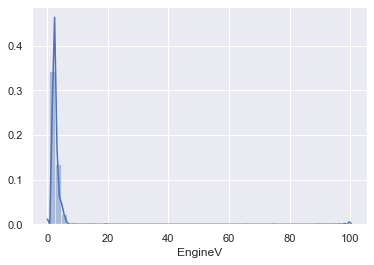

In [99]:
sns.distplot(data_noUV_npMV_noPo_noMo['EngineV'])

In [100]:
# looking at our data manually
EngV = pd.DataFrame(data_noUV_npMV_noPo_noMo['EngineV'])
# EngV = EngV.dropna(axis=0)  #  if we already did not eliminate missing values
EngV

,EngineV
0,2.0
1,2.9
2,5.0
3,4.2
4,2.0
...,...
4339,1.6
4340,3.0
4341,3.5
4342,2.0


In [101]:
# sort Engine valume to see the extreme values
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
2214,1.00
2196,1.00
1923,1.00
...,...
2349,99.99
256,99.99
1311,99.99
3641,99.99


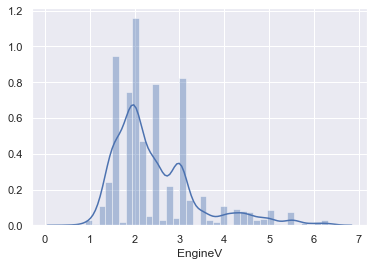

In [102]:
# 99.9 is not a usual values, as we are not car experts we can google it,  0.6 <= Engine volume <= 6.5 so we use the benchmark 6.5
# so we remove all the observations whose Engine volume is above 6.5
data_noUV_npMV_noPo_noMo_noEo = data_noUV_npMV_noPo_noMo[data_noUV_npMV_noPo_noMo['EngineV']<6.5]

sns.distplot(data_noUV_npMV_noPo_noMo_noEo['EngineV'])

In [103]:
# this new PDF is way better than the previous one.

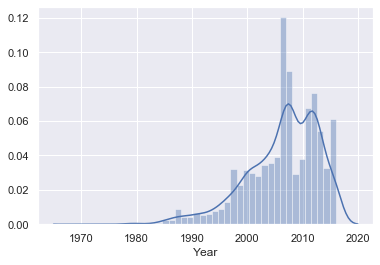

In [104]:
sns.distplot(data_noUV_npMV_noPo_noMo_noEo['Year'])

In [105]:
# here we need to remove first percentile and not last
# keep only 99% and remove first 1% as outliers for year
q1percent = data_noUV_npMV_noPo_noMo_noEo['Year'].quantile(0.01)
q1percent

1987.0

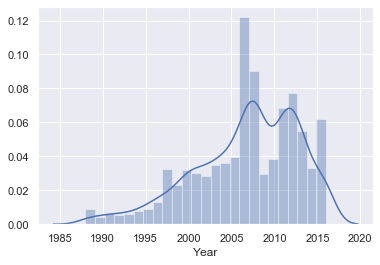

In [106]:
data_noUV_npMV_noPo_noMo_noEo_noYo = data_noUV_npMV_noPo_noMo_noEo[data_noUV_npMV_noPo_noMo_noEo['Year']>q1percent]

sns.distplot(data_noUV_npMV_noPo_noMo_noEo_noYo['Year'])

In [107]:
# it is a little bit better than the previous one

In [108]:
# now we have almost a clean data, but its index is messy as we have elominated some of the observations
# so we need to reset its indecies 
data_cleaned = data_noUV_npMV_noPo_noMo_noEo_noYo.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [109]:
# according to the above table, min and max seem to be more reasonable, and we have eliminated 4345-3866 = 480 problematic
# observations

### Explore and relax some of the Ordinary Least Square assumptions ( second part of data preprocessing)

### Assumption 1: Linearity 

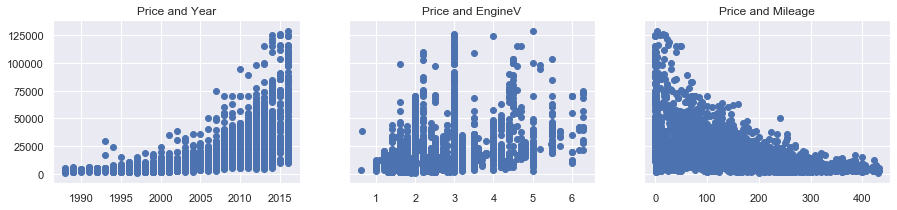

In [110]:
# we have already set our regressive variables, some of which are categorical and some are numerical. at this stage we do 
# not need to be worried about categorical data and we just take numerical data into consideration
# 1- we create scatter plot Y-X1 , Y-X2 and ... 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3)) 
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

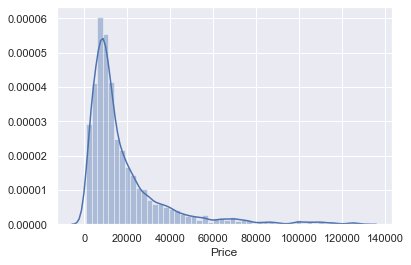

In [111]:
# as you can see there are some patterns, but they are not linear 
# so we should transform one or more variables
# the most important reason why there is no linear relationship is that their PDF is not normal, for example the distribution
# of price is exponential: recal the PDF of price:
sns.distplot(data_cleaned['Price'])

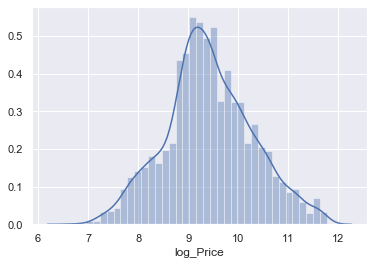

In [112]:
# logarithm transformation are specially useful when facing exponential relationships
# let's take the log of price and creat the plot again
# log is an numpy function
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_Price'] = log_price # add another column called log_Price to our data cleaned data set
sns.distplot(data_cleaned['log_Price'])
# as you see the new PDF looks more like a normal distribution

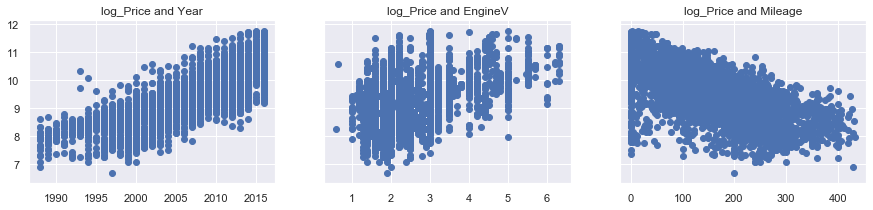

In [113]:
# let's plot the relationship plots again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3)) 
ax1.scatter(data_cleaned['Year'], data_cleaned['log_Price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_Price'])
ax2.set_title('log_Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_Price'])
ax3.set_title('log_Price and Mileage')

plt.show()

In [114]:
# at this time we should get rid of price column as it is not needed anymore
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Assumption 2: No Endogeneity
###    $ \sigma_{X\varepsilon} = 0 $

In [115]:
# most of the time we do not have problem with no endogeneity assumption
# so I can tell you this assumption is not violated, so we do not spend time on that at this time
# but we wil have the opportunity to discuss it after the regression model is created.

### Assumption 3: Normality and homoscedasticity
### $ \varepsilon \sim \mathcal{N}(\mu,\,\sigma^{2}) $

In [116]:
# 1- normality: normality is assumed for a big sample following the central limit theorem 
# 2- zero mean: the zero mean of the distribution of errors is accomplished to the inclusion of the intercept
# in the regression which we discussed already
# 3- homoscedasticity: generally holds as we can see from the our three last plots, and specially logarithm
# transformation is the most common fix for hedoscedasticity 

### Assumption 4: No autocorrelation
### $ \sigma_{\varepsilon_{i}\varepsilon_{j}} = 0$

In [117]:
# we do not need to put too much effort into that, the observations we have are not comming from time-series data or panel
# data (panel data is the combianation of time series and cross functional data), so as they are cross functional data they 
# are such a snapshot of the current situation, so there is no autocorrelation between errors.
# logically speaking, each row (observation) is one customer who tries to sell his/her car, so there is no reason for the 
# observations to be dependent on each other.

### Assumption 5: Multicollinearity

In [118]:
# Multicollinearity refers to when there is high correlation between independent variables
# logically thinking, the higher the year the higher the mileage, so it is logical the 'Year' and 'Mileage' will be correlated.
# unfortunately sklearn does not have a method to check multicolineariy, and we need to use our old friend, statsmodels
# in statsmodel there is a method called 

In [119]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_Price'], dtype=object)

In [120]:
# the method used in statsmodels is called : Variance Inflation Factor (VIF) which measures the ratio of overal model variance
# to the variance of the model with that single independent variable
# VIF above 5 (or some say 6) is considered to be an indicator of high collinearity and so that variable should be removed.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# see below, we do not include our dependent variable Y (log_price) in our VIF calculations, because it has a really high VIF
variables = data_cleaned[['Mileage', 'Year', 'EngineV']] # define numerical values to be checked for multicollinearity detection
VIF_analysis_data = pd.DataFrame() # declare a data in the form of a data frame
VIF_analysis_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
VIF_analysis_data['Features'] = variables.columns
VIF_analysis_data

,VIF,Features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [121]:
# if VIF is one: no multicollinearity as all  (generally VIF>=1)
#  1 < VIF < 5 or 6 : perfectly ok
# some say 5, or, 6, or even 10 is a cut off line
# we stick to the last one and as we see, VIF(year) > 10 therefore we only remove year.
data_cleaned_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)
data_cleaned_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### Preprocessing categorical data 

In [122]:
# create dummy variables
data_with_dummies = pd.get_dummies(data_cleaned_no_multicollinearity, drop_first= True)
# if we have N categories, we need to create N-1 dummies, drop_first = True, will drop the first category of each categorical feature
# if we set drop_first = False, we will introduce multicollinearity into our regression model. 
data_with_dummies.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [123]:
# if we do VIF for the regreesion model with dummies, with and without droping the first_category of each feature, we can
# easily see that VIF would be higher (infinite) and perfect multicolinearity . when "drop_first = False" showing a high level of multicollinearity.

In [124]:
# as it is better to have our dependent variable in the firs column
# to do so we do the rearrenge
# first we get the current arrengement of the data features
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [125]:
# we copy the above output and just move the log_price to the first column
# we declare a new list
rearranged_columns = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [126]:
# use the new rearranged columns in our data
data_preprocessed = data_with_dummies[rearranged_columns]
data_preprocessed.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [127]:
# VIF analysis on our preprocessed data while dropping the first dummies

data_preprocessed.columns.values

array(['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_preprocessed[['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']] 
VIF_analysis_data = pd.DataFrame() 
VIF_analysis_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
VIF_analysis_data['Features'] = variables.columns
VIF_analysis_data

,VIF,Features
0,4.463028,Mileage
1,7.840499,EngineV
2,2.294326,Brand_BMW
3,2.865534,Brand_Mercedes-Benz
4,1.641825,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162211,Brand_Toyota
7,2.844590,Brand_Volkswagen
8,1.464597,Body_hatch
9,1.534624,Body_other


In [129]:
# AS you can see all VIFs are below 10 and pretty much acceptable
# only EngineV and registration yes are high, we keep EngineV
# registration yes is high because most of our observations were registered, 4000 out of 4300, whenever a single category is
# so predominant, we may just drop the variable, otherwise it leads to multicollinearity 


In [130]:
data_preprocessed.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [131]:
# linear regression model
# we have to declare our target (dependent variable) and our inputs (features or independent variables)
# in fact our target is Y and our input is X
targets = data_preprocessed['log_Price']
targets


0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3861     9.350102
3862     9.792556
3863    11.736069
3864     8.779557
3865     9.510445
Name: log_Price, Length: 3866, dtype: float64

In [132]:
inputs = data_preprocessed.drop(['log_Price'], axis=1 )
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [133]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [134]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled_df = pd.DataFrame(inputs_scaled)
inputs_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.219793,-0.474297,2.279367,-0.492228,-0.291095,-0.354684,-0.384529,-0.530076,-0.264622,-0.325323,1.279495,-0.326295,-0.432835,-0.415001,-0.162114,1.333154,0.32142
1,2.789958,0.473780,-0.438718,2.031581,-0.291095,-0.354684,-0.384529,-0.530076,-0.264622,-0.325323,-0.781558,-0.326295,2.310347,-0.415001,-0.162114,-0.750101,0.32142
2,2.067682,2.685960,-0.438718,2.031581,-0.291095,-0.354684,-0.384529,-0.530076,-0.264622,-0.325323,1.279495,-0.326295,-0.432835,2.409634,-0.162114,-0.750101,0.32142
3,0.832485,1.843225,-0.438718,-0.492228,-0.291095,-0.354684,-0.384529,-0.530076,-0.264622,-0.325323,-0.781558,-0.326295,-0.432835,-0.415001,-0.162114,1.333154,0.32142
4,-0.423647,-0.474297,-0.438718,-0.492228,-0.291095,-0.354684,2.600587,-0.530076,-0.264622,-0.325323,-0.781558,-0.326295,-0.432835,-0.415001,-0.162114,1.333154,0.32142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,0.026467,0.052412,-0.438718,-0.492228,-0.291095,-0.354684,-0.384529,1.886521,-0.264622,-0.325323,-0.781558,-0.326295,2.310347,-0.415001,-0.162114,-0.750101,0.32142
3862,-1.313407,-0.895665,-0.438718,-0.492228,-0.291095,-0.354684,2.600587,-0.530076,-0.264622,-0.325323,1.279495,-0.326295,-0.432835,-0.415001,-0.162114,1.333154,0.32142
3863,-1.585569,0.579122,-0.438718,2.031581,-0.291095,-0.354684,-0.384529,-0.530076,-0.264622,-0.325323,1.279495,-0.326295,-0.432835,-0.415001,-0.162114,-0.750101,0.32142
3864,-1.669311,1.105831,2.279367,-0.492228,-0.291095,-0.354684,-0.384529,-0.530076,-0.264622,-0.325323,1.279495,-0.326295,-0.432835,-0.415001,-0.162114,1.333154,0.32142


In [135]:
# note that it is not usually recommended to standardize dummy variables,in fact many practiotioners would stragly argue 
# against it, but for machine learning purposes, no problem with scallling dummy variables, as scaling has no effect on prediction power of the model,


In [136]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)


In [137]:
# create regression with the train data
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predictions (Y_hat)')

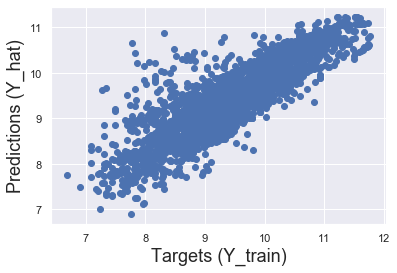

In [138]:
# first check: model accuracy performance with trained data:
# after creating regression model, one way to see the performance of the model is to check the actual obsrvations and 
# compare them to the predicted values by the model (Y_hat)
# so we plot the predicted values of Y agiansed the observed values of Y  (using our train data)
Y_hat_train = reg.predict(X_train) # predicted values
Y_train # actual observed values
plt.scatter(Y_train, Y_hat_train)
plt.xlabel('Targets (Y_train)', size=18)
plt.ylabel('Predictions (Y_hat)', size=18)
# the more the line is 45 degrees, the better the model with train data (we do not know about test yet)

Text(0.5, 1.0, 'Residuals PDF')

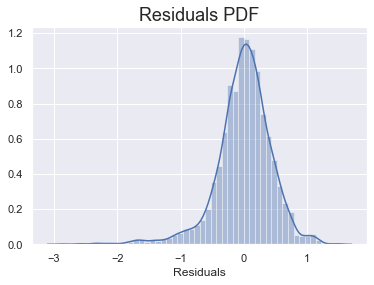

In [139]:
# second check: residual plots
# residual = difference between target and the predictions (residuals are the estimates of the errors)
residual = Y_train - Y_hat_train
sns.distplot(residual)
plt.xlabel('Residuals')
plt.title('Residuals PDF', size=18)

In [140]:
# Normality and homoscedasticity : 
# Normality : the shape looks normal
# Zero mean: seems to be zero
# one problem is that the above distributin is a little left skewed: Y_train - Y_hat < 0 => Y_hat > Y_train meaning that
# the model predicts the price a little higher that it really is ( thoes left place estimations overestimate the target) 
# but on the right side we do not have such ovservations so our model rarely underestimes the target. 

In [141]:
# third check: R-squared
reg.score(X_train, Y_train)
# so our model is explaining 74% of the variability of the data

0.7415645182486199

In [142]:
# calculate weights(coeffcients) and bias(intercept)
reg.intercept_

9.413280072375791

In [143]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [144]:
# make the results more orgnized and readable
reg_summary = pd.DataFrame(inputs.columns.values, columns=['features']) # put the columns titles in rows
reg_summary['weights'] = reg.coef_
reg_summary

,features,weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


In [145]:
# looking at the above weights: 
# a positive weight shows that as a feature increases in value, so do the dependent variable respectively 
# (log_price an as a result "price") and vice versa for negatives
# interpreting the weight for dummies:
# it is different, since this weight compare it with the category that hase been droped, for example for brand dommies,
# droped Audi (which is called benchmark), so other brands with weights higher than 0 have higher prices than our benchmark
# which is Audi , and if their weights are negative they have lower prices than Audi. if their weight is close to zero the
# price is almost similar to the benchmark
# AS we know the higher the weight the higher its impact, but keep in mind that this rule is true for the same type of data
# for exmple we compare the wight of numerical data to each other, and we can't compare them to our dummies. for dummies we 
# just compare them with their respective benchmark, not each other

Text(0.5, 0, 'Targets (Y_test)')

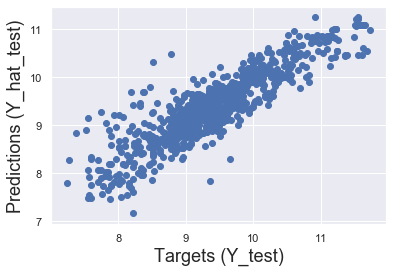

In [146]:
# Testing
# 1- we plot prediction vs observation
# similar to our train data we calculate Y_hat_test and compare with our target, plot it, and check for 45-degree line
Y_hat_test = reg.predict(X_test)
plt.scatter(Y_test, Y_hat_test)
plt.ylabel('Predictions (Y_hat_test)', size = 18)
plt.xlabel('Targets (Y_test)', size = 18)
# as you can see from the plot it seems pretty decent. 

Text(0.5, 0, 'Targets (Y_test)')

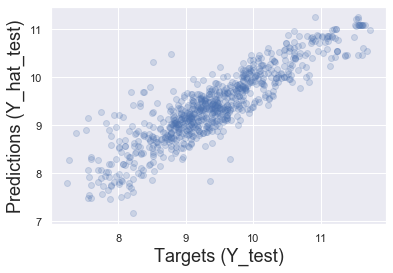

In [155]:
#if we want to see the concentration of the points on the plot, we should use additional argument called 'alpha' in our plot
# alpha shows the proportional opacity of the points, 0<=alpha<=1 , 1 is default. 
# the more saturated the color, the higher the concentrations of the points. 
plt.scatter(Y_test, Y_hat_test, alpha=0.2)
plt.ylabel('Predictions (Y_hat_test)', size = 18)
plt.xlabel('Targets (Y_test)', size = 18)

In [181]:
# 2- we put the prediction aginst observation in a table
# but before that we need to fix two things: 
# firts: out predictions are Log_price, while our observations are price, so we use exp(log(x))=x to get the predicted price
performance_table = pd.DataFrame(np.exp(Y_hat_test), columns=['Predictions'])
performance_table.head()

,Predictions
0,10650.44
1,8041.56
2,6799.07
3,7606.98
4,11309.80


In [182]:
# second: as pandas tries to preserve and match the original indices, if we want to add Y_test to our dataframe, pandas 
# does not restart idecies, so we need to adjust indecies.
# as you can see fro the below code, there are a lot of NaN values
performance_table['Target'] = np.exp(Y_test)
performance_table

,Predictions,Target
0,10650.44,nan
1,8041.56,7900.00
2,6799.07,nan
3,7606.98,nan
4,11309.80,nan
5,21221.25,14200.00
6,19979.06,nan
7,14980.78,nan
8,8392.77,11950.00
9,33073.22,nan


In [183]:
# in order to adjust indices we use reset method
Y_test_adjuseted_indices  = Y_test.reset_index(drop= True)
Y_test_adjuseted_indices

0      7.74
1      9.49
2      9.00
3      8.76
4      9.12
5      9.90
6     10.57
7      9.79
8      8.87
9     10.62
10     9.46
11     9.85
12     8.97
13     9.74
14     9.13
15     9.39
16     9.93
17     9.18
18    10.59
19     9.71
20     9.43
21     9.37
22     8.64
23     9.46
24     9.95
25     8.29
26     8.19
27     9.36
28    10.69
29     8.73
30     8.97
31     9.98
32     8.75
33     9.62
34     9.53
35     9.61
36     9.42
37     9.94
38     9.59
39    10.30
40     9.80
41     8.50
42    10.56
43    10.02
44     9.55
45     9.90
46    10.27
47    10.17
48    10.92
49     8.50
50     7.70
51     8.05
52     9.19
53     9.95
54    11.10
55     9.28
56     9.08
57    10.15
58     9.57
59    10.69
60     9.43
61     8.90
62     9.33
63     8.10
64    10.15
65     9.51
66     7.74
67     8.90
68     8.72
69     7.24
70    11.21
71     9.58
72     9.38
73    10.33
74     7.88
75     8.78
76     8.78
77     8.65
78    10.31
79     9.66
80     9.08
81     8.58
82     7.86
83  

In [184]:
performance_table['Target'] = np.exp(Y_test_adjuseted_indices)
performance_table

,Predictions,Target
0,10650.44,2300.00
1,8041.56,13200.00
2,6799.07,8100.00
3,7606.98,6400.00
4,11309.80,9150.00
5,21221.25,20000.00
6,19979.06,38888.00
7,14980.78,17800.00
8,8392.77,7150.00
9,33073.22,41000.00


In [185]:
# OLS meathod is based on minimizing SSE, which is sum of the error squared. so it is the heart of the model
# add residuals to our table
performance_table['Residuals_Test'] = performance_table['Target'] - performance_table['Predictions']
performance_table.head()

,Predictions,Target,Residuals_Test
0,10650.44,2300.00,-8350.44
1,8041.56,13200.00,5158.44
2,6799.07,8100.00,1300.93
3,7606.98,6400.00,-1206.98
4,11309.80,9150.00,-2159.80


In [186]:
# to make to model more understandable, we express the residulas in percentage (the ratio of residualt to its target value)
performance_table['Residuals%'] = np.absolute(performance_table['Residuals_Test']/performance_table['Target'])*100
performance_table

,Predictions,Target,Residuals_Test,Residuals%
0,10650.44,2300.00,-8350.44,363.06
1,8041.56,13200.00,5158.44,39.08
2,6799.07,8100.00,1300.93,16.06
3,7606.98,6400.00,-1206.98,18.86
4,11309.80,9150.00,-2159.80,23.60
5,21221.25,20000.00,-1221.25,6.11
6,19979.06,38888.00,18908.94,48.62
7,14980.78,17800.00,2819.22,15.84
8,8392.77,7150.00,-1242.77,17.38
9,33073.22,41000.00,7926.78,19.33


In [187]:
# to eavaluate the performance table take its statistics
performance_table.describe()

,Predictions,Target,Residuals_Test,Residuals%
count,774.00,774.00,774.00,774.00
mean,16170.75,18612.01,2441.26,33.81
std,13742.96,20953.01,10835.15,48.27
min,1284.84,1400.00,-29171.37,0.06
25%,7489.04,6999.25,-2013.35,11.28
50%,11561.73,11500.00,150.47,23.24
75%,19726.16,20500.00,3293.70,39.02
max,77447.77,124000.00,80642.60,507.42


In [188]:
# interpret the above table
# go to min, 25%, 50% residuals%. for min=0.05% is really spot-on and acurate :-)
# 25% => 11% is  also good
# 50% => 23% is also relatively close
# overal the output is relatvily acceptable

In [189]:
# we also can sort the performance table by residuals%
performance_table.sort_values(by=['Residuals%'])

,Predictions,Target,Residuals_Test,Residuals%
264,11493.47,11500.00,6.53,0.06
742,16985.25,16999.00,13.75,0.08
60,12486.36,12500.00,13.64,0.11
127,23257.55,23200.00,-57.55,0.25
308,8876.92,8900.00,23.08,0.26
242,7478.35,7500.00,21.65,0.29
698,30600.22,30500.00,-100.22,0.33
379,17733.15,17800.00,66.85,0.38
114,27429.73,27300.00,-129.73,0.48
317,11560.12,11500.00,-60.12,0.52


In [190]:
# as by default pandas does not show the whole data set, if we like to see all rows, we use the below codes
pd.options.display.max_rows = 999
#  using the below expression we will show the numbers with two degits after the dot. 
pd.set_option('display.float.format', lambda x: '%.2f' %x)

performance_table.sort_values(by=['Residuals%'])

# if you go to the bottom of the table, you can see a drastical increase in residual %, which is mostly for cheap cars with 
# low prices. as we faced before using the plot. 
# on average our model is pretty decent at predicting the price, but for cheap cars it is not. 
# for cheap cars our residuals are all negative, therefore our predictions are higher then the target. maybe there are all
# factors for cheap cars that have to be taken into consideration, such as damaged cars are cheapper, or maybe the model
# of the car which we removed at the begining of the analysis was a key feature.

,Predictions,Target,Residuals_Test,Residuals%
264,11493.47,11500.00,6.53,0.06
742,16985.25,16999.00,13.75,0.08
60,12486.36,12500.00,13.64,0.11
127,23257.55,23200.00,-57.55,0.25
308,8876.92,8900.00,23.08,0.26
242,7478.35,7500.00,21.65,0.29
698,30600.22,30500.00,-100.22,0.33
379,17733.15,17800.00,66.85,0.38
114,27429.73,27300.00,-129.73,0.48
317,11560.12,11500.00,-60.12,0.52


In [ ]:
# how to improve our model:
# 1- use a different set of variables.
# 2- remove a bigger part of the outliers
# 3- use different kinds of transformations
# this model that we just created is not outstanding, sometimes the creation of a truly great model for a certain problem
# may take months or even years. Machine Learning requires us to revisit the model many times before we get happy about it.